### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Reading data and looking at values

In [ ]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

### Visibly, the DB does not have missing values.

In [ ]:
data

### Unique values for each column

In [ ]:
data.nunique()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(data['output'])

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

 correlation of heart attacks with chest pain and thalachh

In [ ]:
sns.countplot(data['output'], hue=data['cp'])

cp : Chest Pain type chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic


High number of heart attacks when you have non-anginal pain

In [ ]:
sns.countplot(data['output'], hue=data['thalachh']>140)

Bigger difference at maximum heart rate achieved > 140

In [ ]:
sns.countplot(data['output'], hue=data['slp'])

## Searching for Outliers

In [ ]:
sns.boxplot(y=data['age'])

In [ ]:
sns.boxplot(y=data['trtbps'])

In [ ]:
sns.boxplot(y=data['chol'])

In [ ]:
sns.boxplot(y=data['thalachh'])

In [ ]:
sns.boxplot(y=data['oldpeak'])

### Testing models with outliers and unscaled data

In [ ]:
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Result_outliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Result_outliers_NOscaler[model] = model.score(X_test,y_test)

### Cross Validation

In [ ]:
Cross_outliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X,y)
    Cross_outliers_NOscaler[model] = cross_val_score(model, X, y, cv=5).mean()

In [ ]:
Result_outliers_NOscaler

In [ ]:
Cross_outliers_NOscaler

### Replacing outliers/inconsistent values by average values

In [ ]:
data[data['trtbps']>170]

In [ ]:
trtbpsMean = data['trtbps'].mean()
trtbpsMean

In [ ]:
data['trtbps'].replace([172,174,178,180,192,200], trtbpsMean, inplace=True)

In [ ]:
data[data['trtbps']>170]

In [ ]:
sns.boxplot(y=data['trtbps'])

In [ ]:
data[data['chol']>390]

In [ ]:
cholMean = data['chol'].mean()
cholMean

In [ ]:
data['chol'].replace([394,417, 564, 407, 409], cholMean, inplace=True)
sns.boxplot(y=data['chol'])

In [ ]:
data[data['thalachh']<95]

In [ ]:
thalachhMean = data['thalachh'].mean()
thalachhMean

In [ ]:
data['thalachh'].replace([71,88, 90], thalachhMean, inplace=True)

In [ ]:
sns.boxplot(data['thalachh'])

In [ ]:
data[data['oldpeak']>4]

In [ ]:
oldpeakMean = data['oldpeak'].mean()
oldpeakMean

In [ ]:
data['oldpeak'].replace([4.2,6.2,5.6,4.2,4.4], 1.0, inplace=True)

In [ ]:
sns.boxplot(y=data['oldpeak'])

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data['oldpeak'], hue=data['output'])

oldpeak: ST depression induced by exercise relative to rest

Low levels of oldpeak tend to have more heart attacks than high levels

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data['output'], hue=data['oldpeak'])
plt.legend()

In [ ]:
sns.countplot(data['restecg'], hue=data['output'])

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Value 1 tend to have more heart attack than others.

In [ ]:
sns.countplot(data['chol']>120, hue=data['output'])

Little more heart attacks for cholestoral above 120 mg/dl 

## Testing Models after replacing outliers, data still unscaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Results_NOoutliers_NOscaler = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Results_NOoutliers_NOscaler[model] = model.score(X_test,y_test)

### Cross Validation

In [ ]:
Cross_NOoutliers_NOscaler = {}
for method in methods:
    model = method()
    Cross_NOoutliers_NOscaler[model] = cross_val_score(model, X, y, cv=5).mean()

In [ ]:
Results_NOoutliers_NOscaler

In [ ]:
Cross_NOoutliers_NOscaler

Naive Bayes and Random Forest seems to have the best result in this condition

## Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [ ]:
X = SS.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Results_NOoutliers_scaled = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Results_NOoutliers_scaled[model] = model.score(X_test,y_test)

### Cross Validation

In [ ]:
Cross_NOoutliers_scaled = {}
for method in methods:
    model = method()
    Cross_NOoutliers_scaled[model] = cross_val_score(model, X, y, cv=5).mean()

In [ ]:
Results_NOoutliers_scaled

In [ ]:
Cross_NOoutliers_scaled

### We can see better results in all models with scaled data. Now let's test the data on neural networks

## Setup size of hidden layers

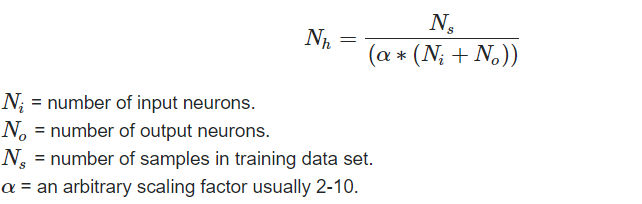
Alpha selected = 2

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=2000, random_state=1)
MLP.fit(X_train,y_train)
MLP.score(X_test,y_test)

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=2000)
Cross_NOoutliers_scaled[MLP] = cross_val_score(MLP, X, y, cv=5).mean()

In [ ]:
Cross_NOoutliers_scaled

### Random Forest model had the best classification result, 0.82

In [ ]:
pred = cross_val_predict(RandomForestClassifier(), X, y, cv=5)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,pred))

### Testing with outliers and scaled data.

In [ ]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
X = SS.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
methods = [DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, RandomForestClassifier]
Result_outliers_scaled = {}
for method in methods:
    model = method()
    model.fit(X_train,y_train)
    Result_outliers_scaled[model] = model.score(X_test,y_test)

### Cross Validation

In [ ]:
Cross_outliers_scaled = {}
for method in methods:
    model = method()
    Cross_outliers_scaled[str(model)] = cross_val_score(model, X, y, cv=5).mean()

In [ ]:
Result_outliers_scaled

In [ ]:
Cross_outliers_scaled

Random Forest seems to have the best results under the conditions presented.